In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data
base_folder = Path("/Users/stimpfli/Desktop/nmf2-paper/revision_stepping/data/benchmark_turning_parallel_adhesion_R=2.0_old/")
figure_folder = base_folder.parent / "figures"
figure_folder.mkdir(exist_ok=True)
data = pd.read_csv(base_folder / "turning_data_0-999_basic.csv")
data.head(2)

,timestep,run_time,l_drive,r_drive,turn_start,turn_ends,cpg_phase_turn_start,turning_angle_change,k
0,0.0001,1.5,0.185761,0.623037,6646,11646,5.880459,-1.249979,0
1,0.0001,1.5,-0.979873,-0.047832,7145,12145,3.360153,13.655178,1


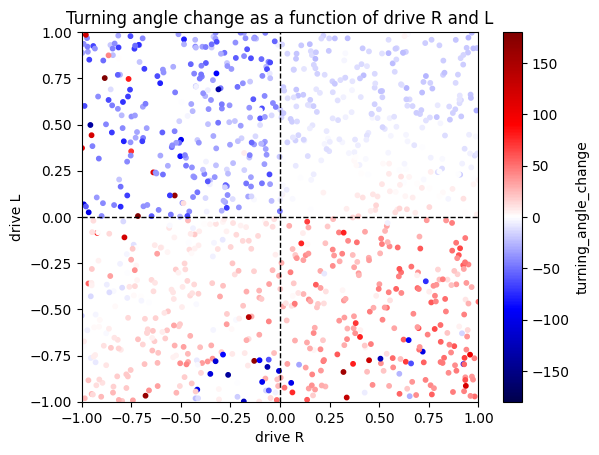

In [119]:
plt.scatter(data["r_drive"], data["l_drive"], c=data["turning_angle_change"], cmap="seismic", s=10)
plt.colorbar(label="turning_angle_change")
plt.xlabel("drive R")
plt.ylabel("drive L")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
#colorbar limits
plt.clim(-180, 180)
plt.title("Turning angle change as a function of drive R and L")
plt.axvline(0, color="black", lw=1, ls="--")
plt.axhline(0, color="black", lw=1, ls="--")
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/2819172647.py:10: SyntaxWarning: invalid escape sequence '\p'
  cbar.set_ticklabels(["0", "$\pi$", "$2\pi$"])
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/2819172647.py:10: SyntaxWarning: invalid escape sequence '\p'
  cbar.set_ticklabels(["0", "$\pi$", "$2\pi$"])


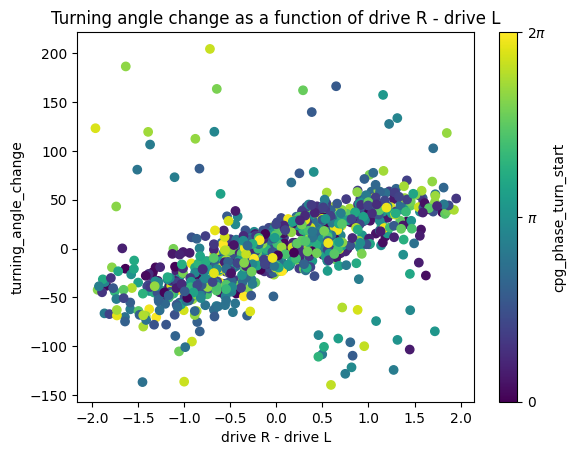

In [120]:
# plt the difference in drive vs turning angle change
plt.scatter(data["r_drive"] - data["l_drive"], data["turning_angle_change"], c=data["cpg_phase_turn_start"], cmap="viridis")
cbar = plt.colorbar(label="cpg_phase_turn_start")
plt.xlabel("drive R - drive L")
plt.ylabel("turning_angle_change")
plt.title("Turning angle change as a function of drive R - drive L")
# set colorbar ticks 0 to 2pi
plt.clim(0, 2*np.pi)
cbar.set_ticks([0, np.pi, 2*np.pi])
cbar.set_ticklabels(["0", "$\pi$", "$2\pi$"])


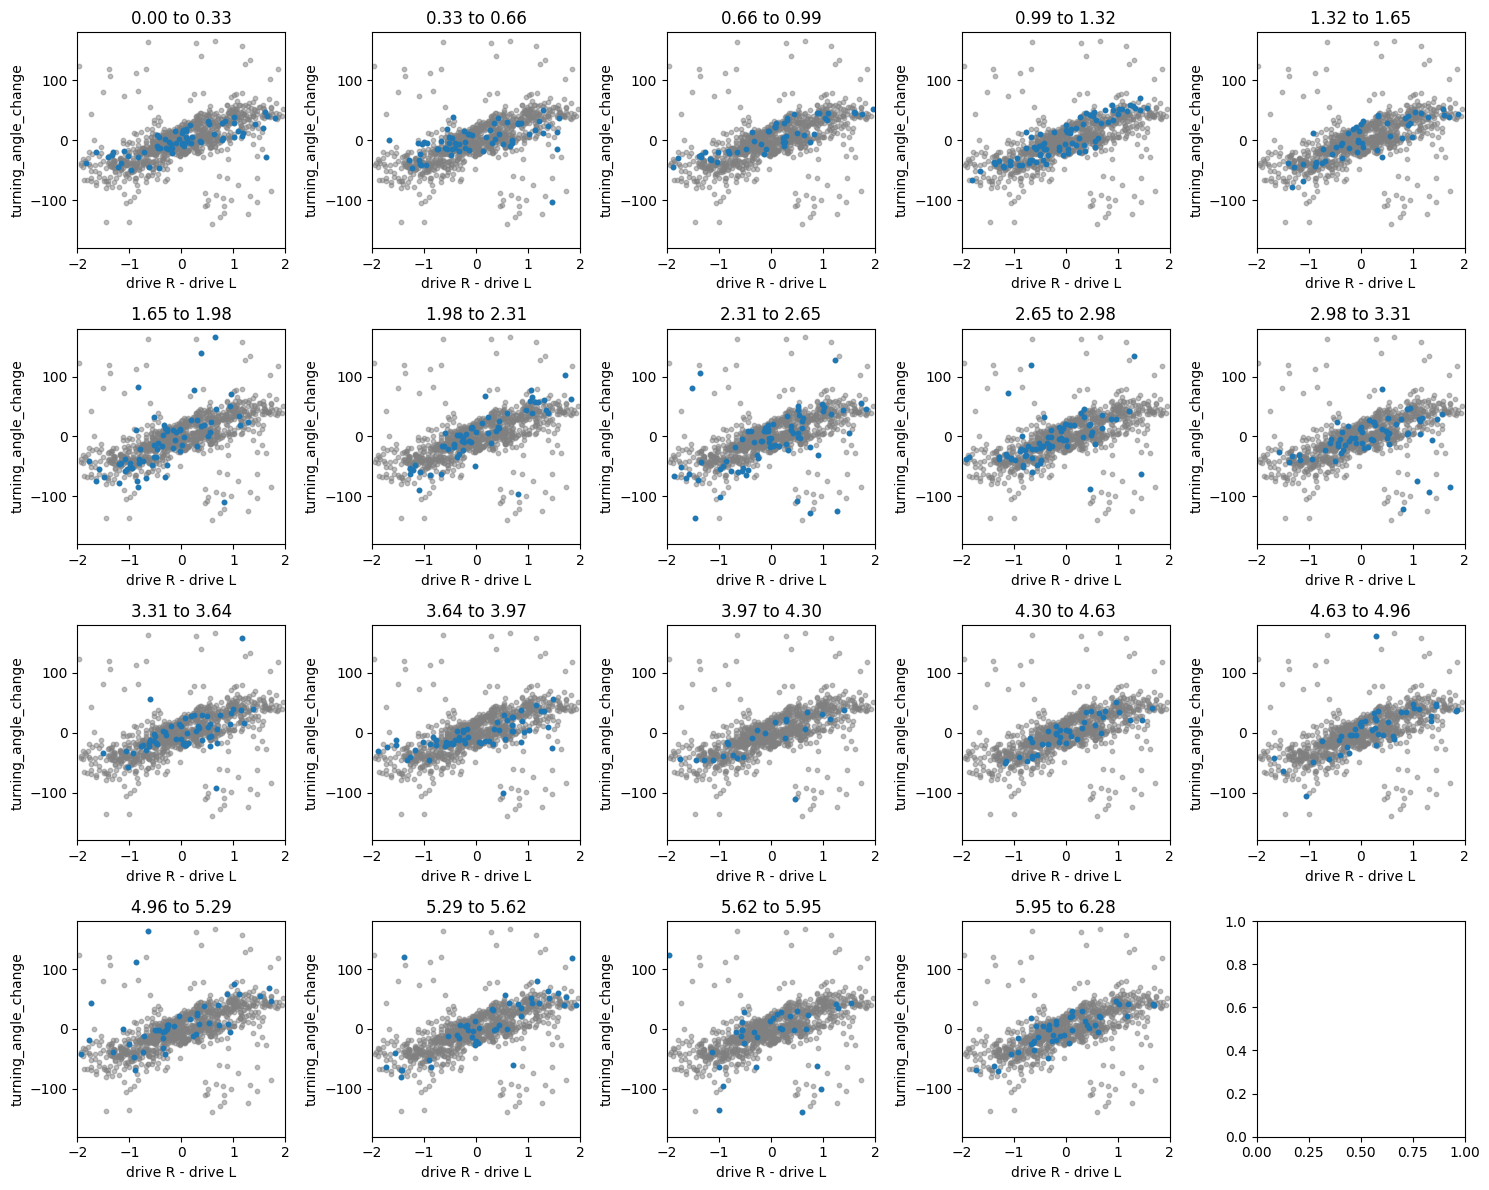

In [121]:
n_bins = 20
bins = np.linspace(0, 2*np.pi, n_bins)
n_cols = 5
n_rows = np.ceil(n_bins/n_cols).astype(int)
subplot_size = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols, subplot_size*n_rows))
flat_axs = axs.flatten()

for i in range(n_bins-1):
    mask = (data["cpg_phase_turn_start"] >= bins[i]) & (data["cpg_phase_turn_start"] < bins[i+1])
    flat_axs[i].scatter(data["r_drive"] - data["l_drive"], data["turning_angle_change"], color="grey", s=10, alpha=0.5)
    flat_axs[i].scatter(data["r_drive"][mask] - data["l_drive"][mask], data["turning_angle_change"][mask], s=10)
    flat_axs[i].set_title(f"{bins[i]:.2f} to {bins[i+1]:.2f}")
    flat_axs[i].set_xlim(-2, 2)
    flat_axs[i].set_ylim(-180, 180)
    flat_axs[i].set_xlabel("drive R - drive L")
    flat_axs[i].set_ylabel("turning_angle_change")

plt.tight_layout()

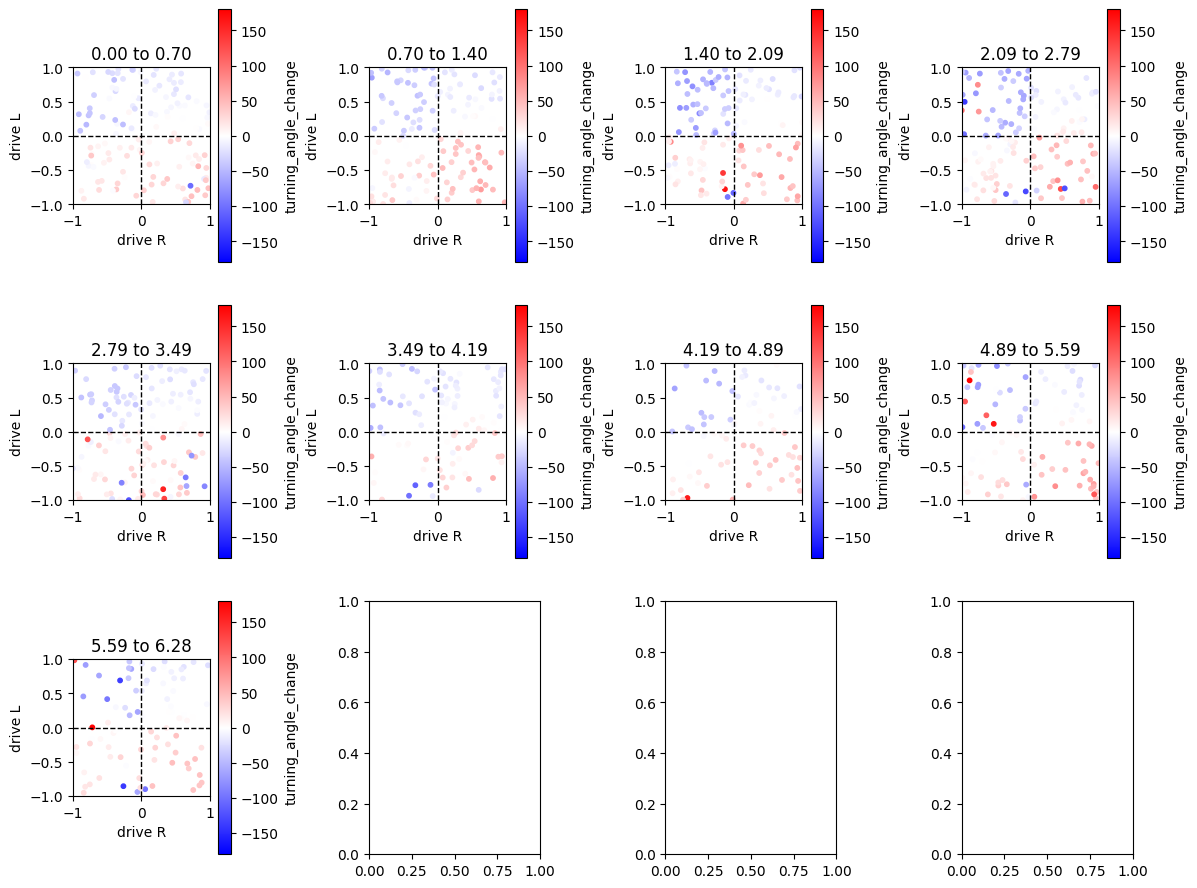

In [122]:
n_bins = 10
bins = np.linspace(0, 2*np.pi, n_bins)
n_cols = 4
n_rows = np.ceil(n_bins/n_cols).astype(int)
subplot_size = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols, subplot_size*n_rows))
flat_axs = axs.flatten()

for i in range(n_bins-1):
    mask = (data["cpg_phase_turn_start"] >= bins[i]) & (data["cpg_phase_turn_start"] < bins[i+1])
    plot = flat_axs[i].scatter(data["r_drive"][mask], data["l_drive"][mask], c = data["turning_angle_change"][mask], cmap="bwr", s=10)
    flat_axs[i].set_title(f"{bins[i]:.2f} to {bins[i+1]:.2f}")
    flat_axs[i].set_xlim(-1, 1)
    flat_axs[i].set_ylim(-1, 1)
    flat_axs[i].set_xlabel("drive R")
    flat_axs[i].set_ylabel("drive L")
    # add colorbar
    cbar = plt.colorbar(plot, ax=flat_axs[i], label="turning_angle_change")
    plot.set_clim(-180, 180)
    flat_axs[i].axvline(0, color="black", lw=1, ls="--")
    flat_axs[i].axhline(0, color="black", lw=1, ls="--")
    # axis ratio 1:1
    flat_axs[i].set_aspect('equal', adjustable='box')

plt.tight_layout()

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/3581152723.py:12: SyntaxWarning: invalid escape sequence '\p'
  flat_axs[i].set_title(f"{bins[i]/np.pi:.2f}$\pi$ to {bins[i+1]/np.pi:.2f}$\pi$")
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/3581152723.py:12: SyntaxWarning: invalid escape sequence '\p'
  flat_axs[i].set_title(f"{bins[i]/np.pi:.2f}$\pi$ to {bins[i+1]/np.pi:.2f}$\pi$")


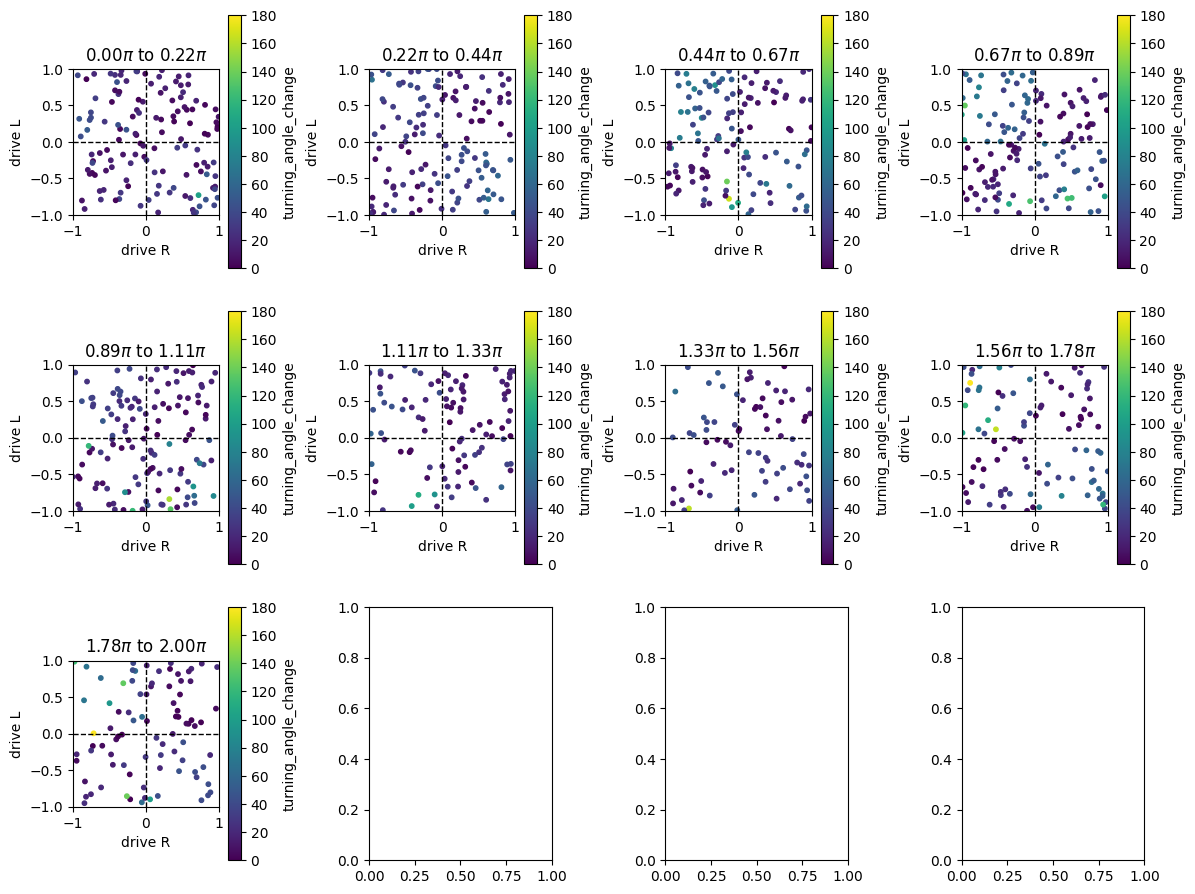

In [123]:
n_bins = 10
bins = np.linspace(0, 2*np.pi, n_bins)
n_cols = 4
n_rows = np.ceil(n_bins/n_cols).astype(int)
subplot_size = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(subplot_size*n_cols, subplot_size*n_rows))
flat_axs = axs.flatten()

for i in range(n_bins-1):
    mask = (data["cpg_phase_turn_start"] >= bins[i]) & (data["cpg_phase_turn_start"] < bins[i+1])
    plot = flat_axs[i].scatter(data["r_drive"][mask], data["l_drive"][mask], c = np.abs(data["turning_angle_change"][mask]), cmap="viridis", s=10)
    flat_axs[i].set_title(f"{bins[i]/np.pi:.2f}$\pi$ to {bins[i+1]/np.pi:.2f}$\pi$")
    flat_axs[i].set_xlim(-1, 1)
    flat_axs[i].set_ylim(-1, 1)
    flat_axs[i].set_xlabel("drive R")
    flat_axs[i].set_ylabel("drive L")
    # add colorbar
    cbar = plt.colorbar(plot, ax=flat_axs[i], label="turning_angle_change")
    plot.set_clim(0, 180)
    flat_axs[i].axvline(0, color="black", lw=1, ls="--")
    flat_axs[i].axhline(0, color="black", lw=1, ls="--")
    # axis ratio 1:1
    flat_axs[i].set_aspect('equal', adjustable='box')

plt.tight_layout()

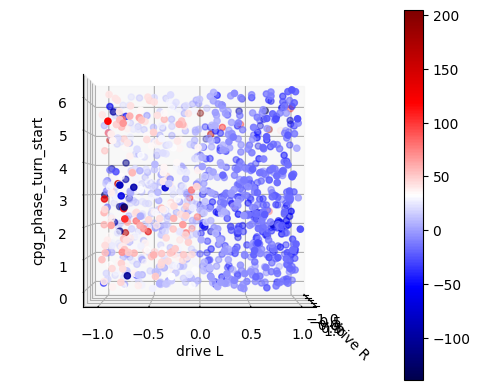

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = data["r_drive"]
y = data["l_drive"]
z = data["cpg_phase_turn_start"]
c = data["turning_angle_change"]

img = ax.scatter(x, y, z, c=c, cmap="seismic")
fig.colorbar(img)
ax.set_xlabel("drive R")
ax.set_ylabel("drive L")
ax.set_zlabel("cpg_phase_turn_start")
# ratio 1:1:1
ax.set_box_aspect([1,1,1])
# take snapshot from multiple angles
for angle in range(0, 360, 45):
    ax.view_init(0, angle)
    plt.show()
    

Text(0.5, 1.0, 'Turning angle change as a function of drive R - drive L')

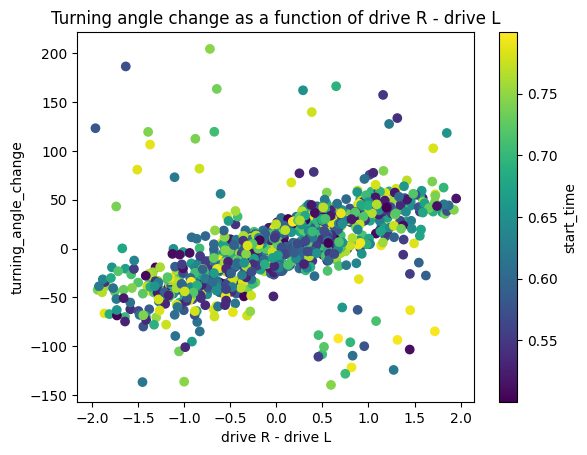

In [125]:
# plt the difference in drive vs turning angle change
plt.scatter(data["r_drive"] - data["l_drive"], data["turning_angle_change"], c=data["turn_start"]*data["timestep"], cmap="viridis")
cbar = plt.colorbar(label="start_time")
plt.xlabel("drive R - drive L")
plt.ylabel("turning_angle_change")
plt.title("Turning angle change as a function of drive R - drive L")

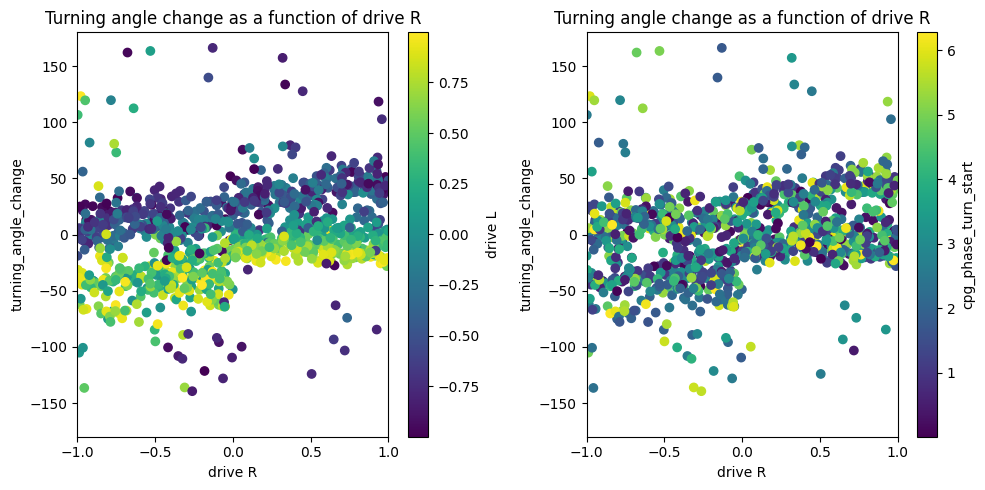

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot = axs[0].scatter(data["r_drive"], data["turning_angle_change"], c=data["l_drive"], cmap="viridis")
axs[0].set_xlabel("drive R")
axs[0].set_ylabel("turning_angle_change")
axs[0].set_title("Turning angle change as a function of drive R")
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-180, 180)
# add colorbar
cbar = plt.colorbar(plot, ax=axs[0], label="drive L")

plot = axs[1].scatter(data["r_drive"], data["turning_angle_change"], c=data["cpg_phase_turn_start"], cmap="viridis")
axs[1].set_xlabel("drive R")
axs[1].set_ylabel("turning_angle_change")
axs[1].set_title("Turning angle change as a function of drive R")
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-180, 180)
# add colorbar
cbar = plt.colorbar(plot, ax=axs[1], label="cpg_phase_turn_start")
plt.tight_layout()

# Full dataset

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_full = pd.read_csv(base_folder / "turning_data_0-999_full.csv")
data_full.head(2)

,fly_pos_x,fly_pos_y,fly_yaw,fly_roll,fly_pitch,fly_orientation_x,fly_orientation_y,exp_ids
0,0.028803,-0.010674,0.000000,0.000000,0.000000,0.724062,-0.000004,0.0
1,0.028506,-0.010936,1.570545,-0.000887,0.809603,0.724013,-0.000793,0.0


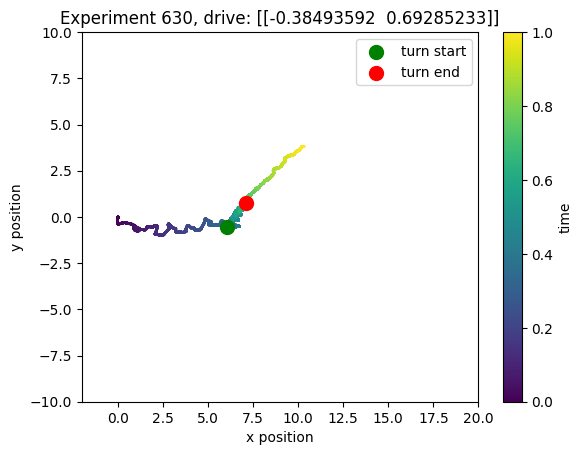

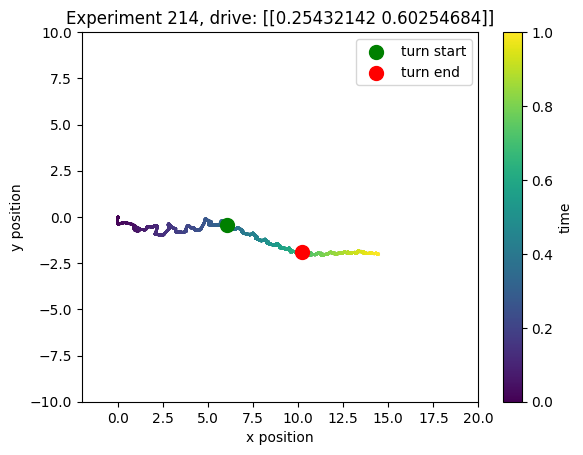

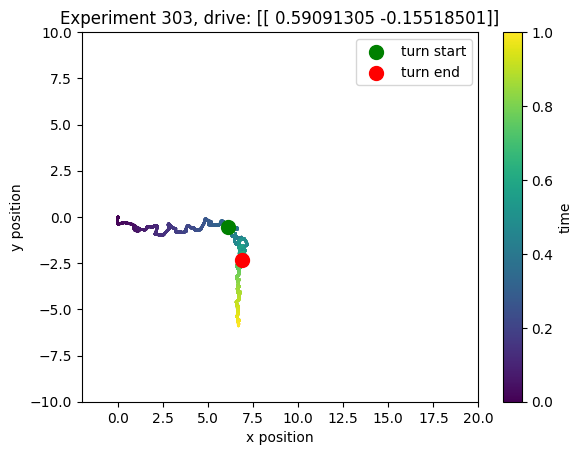

In [128]:
max_exp_id = data_full["exp_ids"].max().astype(int)
show_n_exp = 3
exp_ids = np.random.choice(max_exp_id, show_n_exp, replace=False)

for i in exp_ids:
    exp_data = data_full.query(f"exp_ids == {i}")
    n_pts = len(exp_data)
    x_pos = exp_data["fly_pos_x"].values
    y_pos = exp_data["fly_pos_y"].values

    exp_params = data.query(f"k == {i}")
    turn_start = exp_params["turn_start"].iloc[0].astype(int)
    turn_end = exp_params["turn_ends"].iloc[0].astype(int)
    drives = exp_params[["l_drive", "r_drive"]].values

    plt.scatter(x_pos, y_pos, c=np.arange(n_pts), cmap="viridis", s=1)
    plt.scatter(x_pos[turn_start], y_pos[turn_start], c="green", s=100, label="turn start")
    plt.scatter(x_pos[turn_end], y_pos[turn_end], c="red", s=100, label="turn end")
    plt.legend()
    plt.colorbar(label="time")
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.xlim([-2, 20])
    plt.ylim([-10, 10])
    plt.title(f"Experiment {i}, drive: {drives}")
    plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/3742720292.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/3742720292.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/3742720292.py:26: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])


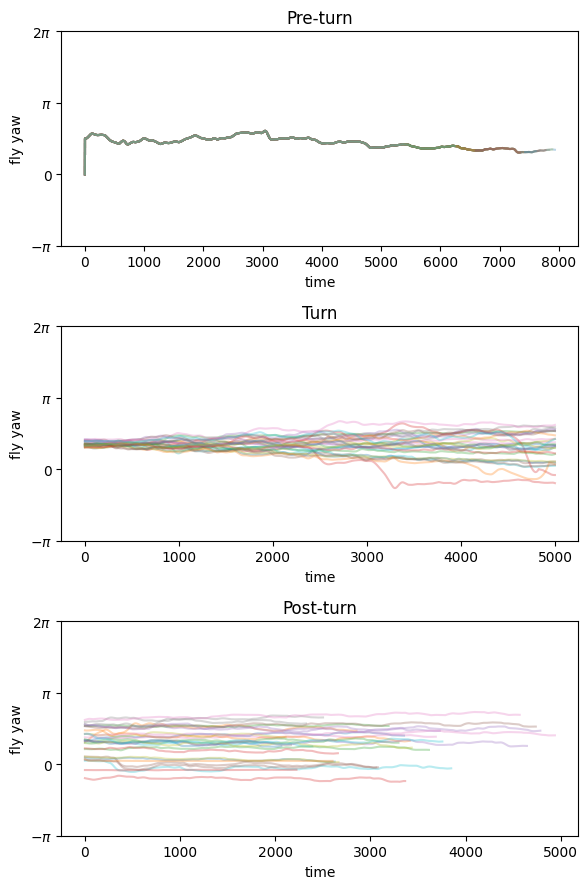

In [129]:
fig, axs = plt.subplots(3, 1, figsize=(6, 9))
alpha = 0.3

for i in range(30):
    exp_data = data_full.query(f"exp_ids == {i}")
    n_pts = len(exp_data)
    exp_params = data.query(f"k == {i}")
    if len(exp_params) == 0:
        continue
    turn_start, turn_end = exp_params["turn_start"].iloc[0], exp_params["turn_ends"].iloc[0]
    fly_yaw = np.unwrap(exp_data["fly_yaw"].values)
    fly_yaw_preturn = fly_yaw[:turn_start]
    fly_yaw_turn = fly_yaw[turn_start:turn_end]
    fly_yaw_postturn = fly_yaw[turn_end:]
    axs[0].plot(fly_yaw_preturn, alpha=alpha)
    axs[1].plot(fly_yaw_turn, alpha=alpha)
    axs[2].plot(fly_yaw_postturn, alpha=alpha)

axs[0].set_title("Pre-turn")
axs[1].set_title("Turn")
axs[2].set_title("Post-turn")
for ax in axs:
    ax.set_xlabel("time")
    ax.set_ylabel("fly yaw")
    ax.set_ylim(-np.pi, 2*np.pi)
    ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
plt.tight_layout()

<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/2056030876.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/2056030876.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
/var/folders/g_/c0_j6ct50dz58057rf7b3_s00000gq/T/ipykernel_14332/2056030876.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])


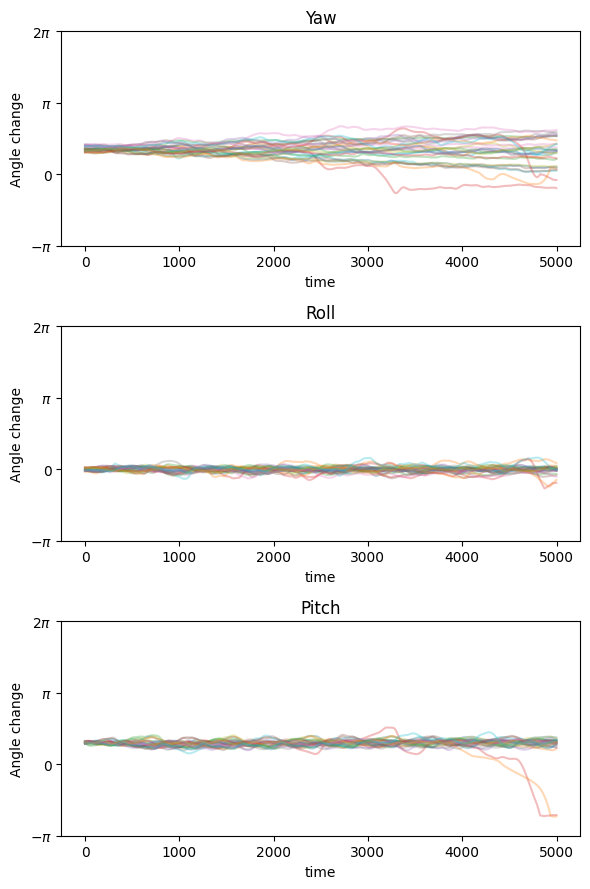

In [130]:
fig, axs = plt.subplots(3, 1, figsize=(6, 9))
alpha = 0.3

for i in range(30):
    exp_data = data_full.query(f"exp_ids == {i}")
    n_pts = len(exp_data)
    exp_params = data.query(f"k == {i}")
    if len(exp_params) == 0:
        continue
    turn_start, turn_end = exp_params["turn_start"].iloc[0], exp_params["turn_ends"].iloc[0]
    fly_yaw = np.unwrap(exp_data["fly_yaw"].values)
    fly_roll = np.unwrap(exp_data["fly_roll"].values)
    fly_pitch = np.unwrap(exp_data["fly_pitch"].values)
    fly_yaw_turn = fly_yaw[turn_start:turn_end]
    fly_roll_turn = fly_roll[turn_start:turn_end]
    fly_pitch_turn = fly_pitch[turn_start:turn_end]
    axs[0].plot(fly_yaw_turn, alpha=alpha)
    axs[1].plot(fly_roll_turn, alpha=alpha)
    axs[2].plot(fly_pitch_turn, alpha=alpha)

axs[0].set_title("Yaw")
axs[1].set_title("Roll")
axs[2].set_title("Pitch")
for ax in axs:
    ax.set_xlabel("time")
    ax.set_ylabel("Angle change")
    ax.set_ylim(-np.pi, 2*np.pi)
    ax.set_yticks([-np.pi, 0, np.pi, 2*np.pi], labels=["$-\pi$", "0", "$\pi$", "$2\pi$"])
plt.tight_layout()

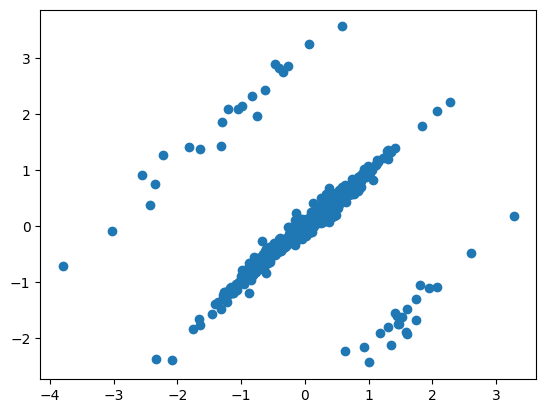

In [131]:
# calculate yaw based angle_change
n_exps = data["k"].max()

yaw_angle_change = []
data["yaw_angle_change"] = np.nan
for i in range(n_exps+1):
    exp_data = data_full.query(f"exp_ids == {i}")
    n_pts = len(exp_data)
    exp_params = data.query(f"k == {i}")
    if len(exp_params) == 0:
        continue
    turn_start, turn_end = exp_params["turn_start"].iloc[0], exp_params["turn_ends"].iloc[0]
    fly_yaw = np.unwrap(exp_data["fly_yaw"].values)
    data.loc[exp_params.index, "yaw_angle_change"] = fly_yaw[turn_end] - fly_yaw[turn_start]

plt.scatter(data["yaw_angle_change"], np.deg2rad(data["turning_angle_change"]))

# Try regressions (can we predict the change in angle)

In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("turning_angle_change ~ yaw_angle_change", data=data).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     turning_angle_change   R-squared:                       0.273
Model:                              OLS   Adj. R-squared:                  0.272
Method:                   Least Squares   F-statistic:                     375.2
Date:                  Fri, 09 Feb 2024   Prob (F-statistic):           3.33e-71
Time:                          10:17:33   Log-Likelihood:                -4920.4
No. Observations:                  1000   AIC:                             9845.
Df Residuals:                       998   BIC:                             9855.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

In [133]:
model_serious = ols("turning_angle_change ~ r_drive + l_drive + cpg_phase_turn_start +" \
                    " r_drive:l_drive + r_drive:cpg_phase_turn_start + l_drive:cpg_phase_turn_start",
                    #" l_drive:r_drive:cpg_phase_turn_start",
                      data=data).fit()
print(model_serious.summary())

                             OLS Regression Results                             
Dep. Variable:     turning_angle_change   R-squared:                       0.318
Model:                              OLS   Adj. R-squared:                  0.314
Method:                   Least Squares   F-statistic:                     77.16
Date:                  Fri, 09 Feb 2024   Prob (F-statistic):           3.87e-79
Time:                          10:17:33   Log-Likelihood:                -4888.6
No. Observations:                  1000   AIC:                             9791.
Df Residuals:                       993   BIC:                             9826.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

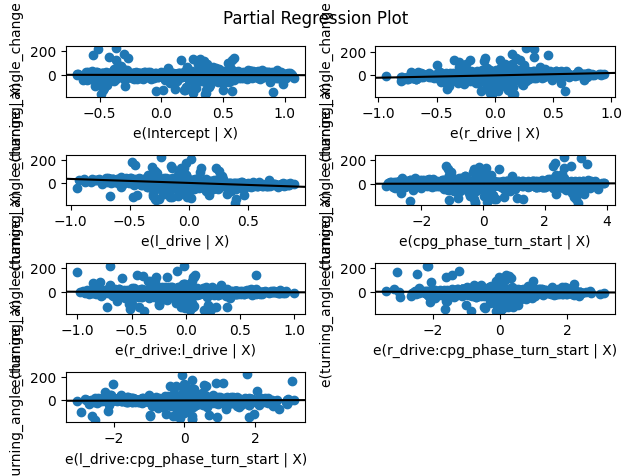

In [134]:
fig = sm.graphics.plot_partregress_grid(model_serious)
fig.tight_layout(pad=1.0)

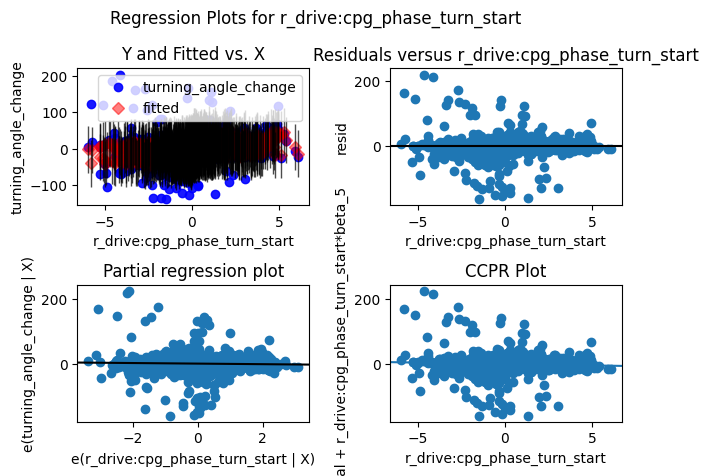

In [135]:
fig = sm.graphics.plot_regress_exog(model_serious, "r_drive:cpg_phase_turn_start")
fig.tight_layout(pad=1.0)


# Train a MLP

In [136]:
# train a tiny mlp to perform the regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split

X = data[["r_drive", "l_drive", "cpg_phase_turn_start"]].values
y = data["turning_angle_change"].values
# perform cross validation
mlp = MLPRegressor(hidden_layer_sizes=(5, 5, 5), max_iter=int(1e5))


In [137]:
scores = cross_val_score(mlp, X, y, cv=5, scoring="r2")
print(scores)

[0.35522911 0.24720237 0.37701631 0.19514417 0.42019063]


# Compare to a regression

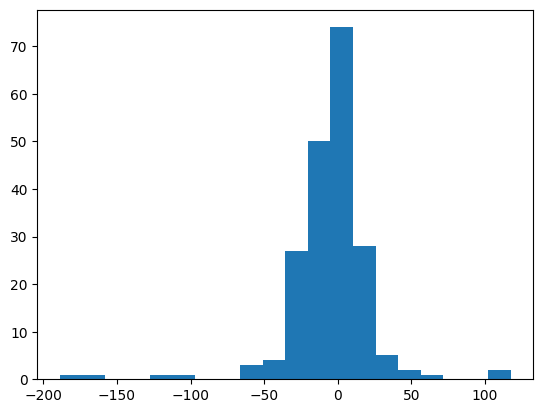

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mse_nn = np.mean(np.abs(y_pred - y_test))

# plot residual distribution
residuals = y_pred - y_test
plt.hist(residuals, bins=20)
plt.show()

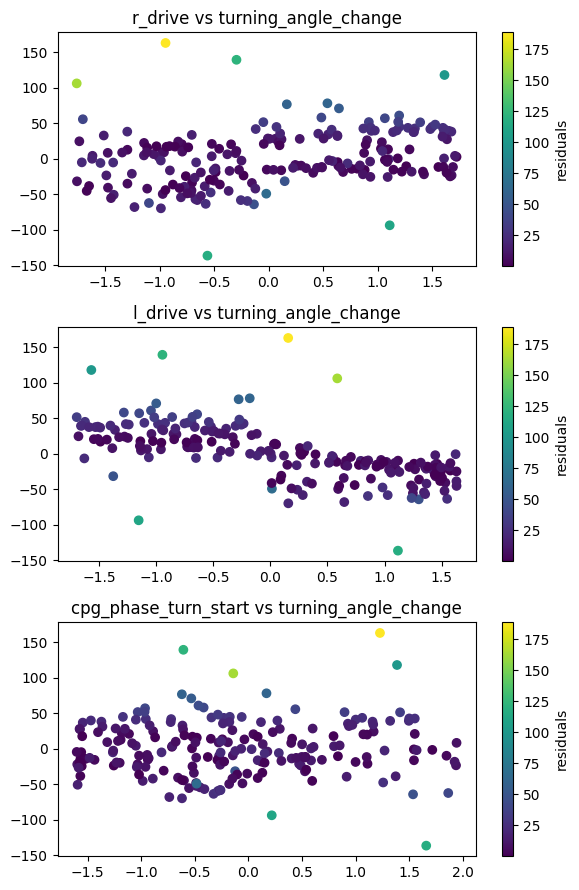

In [139]:
# look at the profile of the points with the largest residuals
residuals = np.abs(residuals)
abs_residual_thr = 20
bad_resisduals_ids = np.where(residuals > abs_residual_thr)[0]

predictors = ["r_drive", "l_drive", "cpg_phase_turn_start"]

fig, axs = plt.subplots(3, 1, figsize=(6, 9))
for i in range(3):
    points = axs[i].scatter(X_test[:, i], y_test, c=residuals, cmap="viridis")
    axs[i].set_title(f"{predictors[i]} vs turning_angle_change")
    fig.colorbar(points, ax=axs[i], label="residuals")

plt.tight_layout()

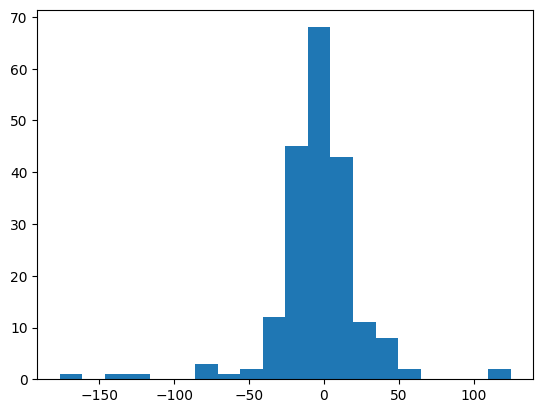

In [140]:
# perform regression from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lr = np.mean(np.abs(y_pred - y_test))

# plot residual distribution
residuals = y_pred - y_test
plt.hist(residuals, bins=20)
plt.show()

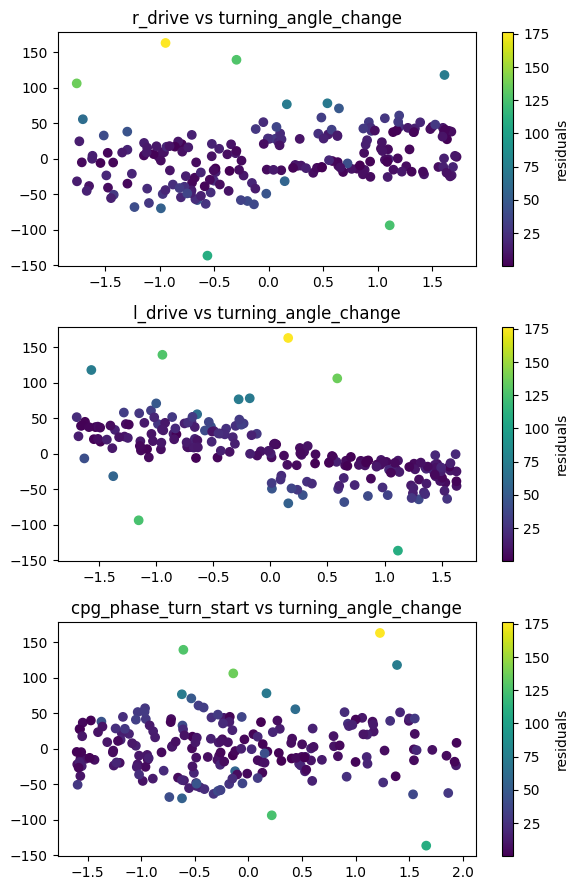

In [141]:
# look at the profile of the points with the largest residuals
residuals = np.abs(residuals)
abs_residual_thr = 20
bad_resisduals_ids = np.where(residuals > abs_residual_thr)[0]

predictors = ["r_drive", "l_drive", "cpg_phase_turn_start"]

fig, axs = plt.subplots(3, 1, figsize=(6, 9))
for i in range(3):
    points = axs[i].scatter(X_test[:, i], y_test, c=residuals, cmap="viridis")
    axs[i].set_title(f"{predictors[i]} vs turning_angle_change")
    fig.colorbar(points, ax=axs[i], label="residuals")

plt.tight_layout()

In [142]:
print(f"mse_nn: {mse_nn}, mse_lr: {mse_lr}")

mse_nn: 17.270372302136426, mse_lr: 18.225259448470215


# Compute initial plot by taking into account tipped over flies

In [143]:
is_rolled = data_full[["exp_ids", "fly_roll"]].groupby("exp_ids").apply(lambda x: np.any(np.abs(x["fly_roll"].iloc[0]- np.unwrap(x["fly_roll"])) > np.pi), include_groups=False)
is_pitched = data_full[["exp_ids", "fly_pitch"]].groupby("exp_ids").apply(lambda x: np.any(np.abs(x["fly_pitch"].iloc[0]- np.unwrap(x["fly_pitch"])) > np.pi), include_groups=False)

print(np.any(is_rolled), np.any(is_pitched), len(is_rolled), len(is_pitched), len(data))

False True 1000 1000 1000


In [144]:
is_rolled.name = "is_rolled"
is_pitched.name = "is_pitched"

data_flip = data.merge(is_rolled, left_on="k", right_index=True)
data_flip = data_flip.merge(is_pitched, left_on="k", right_index=True)
data_flip.head(2)

,timestep,run_time,l_drive,r_drive,turn_start,turn_ends,cpg_phase_turn_start,turning_angle_change,k,yaw_angle_change,is_rolled,is_pitched
0,0.0001,1.5,0.185761,0.623037,6646,11646,5.880459,-1.249979,0,0.015575,False,False
1,0.0001,1.5,-0.979873,-0.047832,7145,12145,3.360153,13.655178,1,-0.147351,False,False


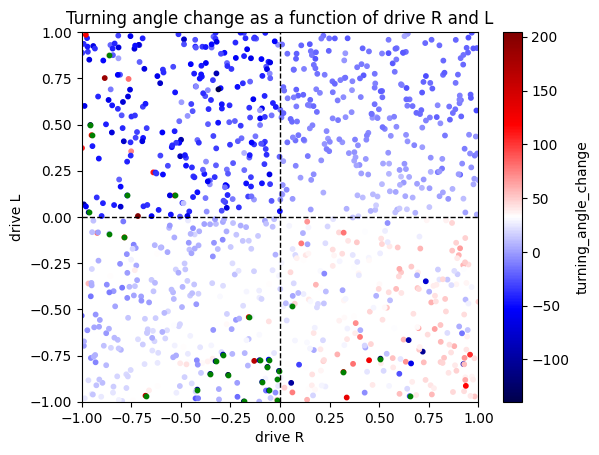

<Figure size 640x480 with 0 Axes>

In [145]:
img = plt.scatter(data["r_drive"], data["l_drive"], c=data["turning_angle_change"], cmap="seismic", s=10)
# if is pitched or is rolled show the dot in green 
flipped_mask = (data_flip["is_rolled"] | data_flip["is_pitched"])
plt.scatter(data["r_drive"][flipped_mask], data["l_drive"][flipped_mask], c="green", s=10)
plt.colorbar(img, label="turning_angle_change")
plt.xlabel("drive R")
plt.ylabel("drive L")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
#colorbar limits
plt.clim(-180, 180)
plt.title("Turning angle change as a function of drive R and L")
plt.axvline(0, color="black", lw=1, ls="--")
plt.axhline(0, color="black", lw=1, ls="--")
plt.show()

plot_name = str(base_folder.parent.name)+"_drive_turning_angle_change.png"
plt.savefig(figure_folder / plot_name, dpi=300)